# Evaluating the choice of atlas or neuroanatomical feature
This notebook accompanies below paper: 

><span style="color:gray">F. Sepehrband\*, K.M. Lynch, R.P. Cabeen, C. Gonzalez-Zacarias, L. Zhao, M. D'Arcy, C. Kesselman, M.M. Herting, I.D. Dinov, A.W. Toga, K.A. Clark,   
**Neuroanatomical Morphometric Characterization of Sex Differences in Youth Using Multivariate Statistical Learning**,  
*NeuroImage*,   
submitted September 2017</span>.

In this notebook, we evaluate the choice of atlas or neuroanatomical feature on the cross validation accuracy of the multivariate sex difference model.  

* Strucutral MRI of the [PNC study](http://www.med.upenn.edu/bbl/philadelphianeurodevelopmentalcohort.html ) were used for this study.  
* Morphological features of the strucutral images were derived using [FreeSurfer](http://freesurfer.net) toolkit.  
* FreeSurfer analysis was performed using [LONI pipeline](http://pipeline.loni.usc.edu) on high performance computing of <font color='red'>**USC**</font> Mark and Mary Stevens Neuroimaging and Informatics [Institute](http://www.ini.usc.edu), Keck school of Medicine of <font color='red'>**USC**</font>. The outputs were QC'ed and used as the input of this notebook. 

author:  
Farshid Sepehrband,   
*Laboratory of Neuro Imaging, USC Mark and Mary Stevens Neuroimaging and Informatics Institute, Keck School of Medicine of USC, University of Southern California, Los Angeles, CA, USA*
<farshid.sepehrband@loni.usc.edu>  
@fsepehrband



In [9]:
# some basic and general libraries
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
import pandas as pd
import seaborn as sns
import os
# %pylab inline

### Read data

In [10]:
df = pd.read_csv('../../NeuroAnat_SexDiff_data/ALL.csv')
aseg = pd.read_csv('../../NeuroAnat_SexDiff_data/aseg.csv')
wm = pd.read_csv('../../NeuroAnat_SexDiff_data/wm.csv')

aseg['Feature'] = 'subcorical volume'
wm['Feature'] = 'WM volume'

temp = pd.concat([df,aseg,wm],axis=0)
df = temp

### Plot model performances
Choose between:
> **VA**: validation accuracy  
> **AUC**: area under the ROC curve

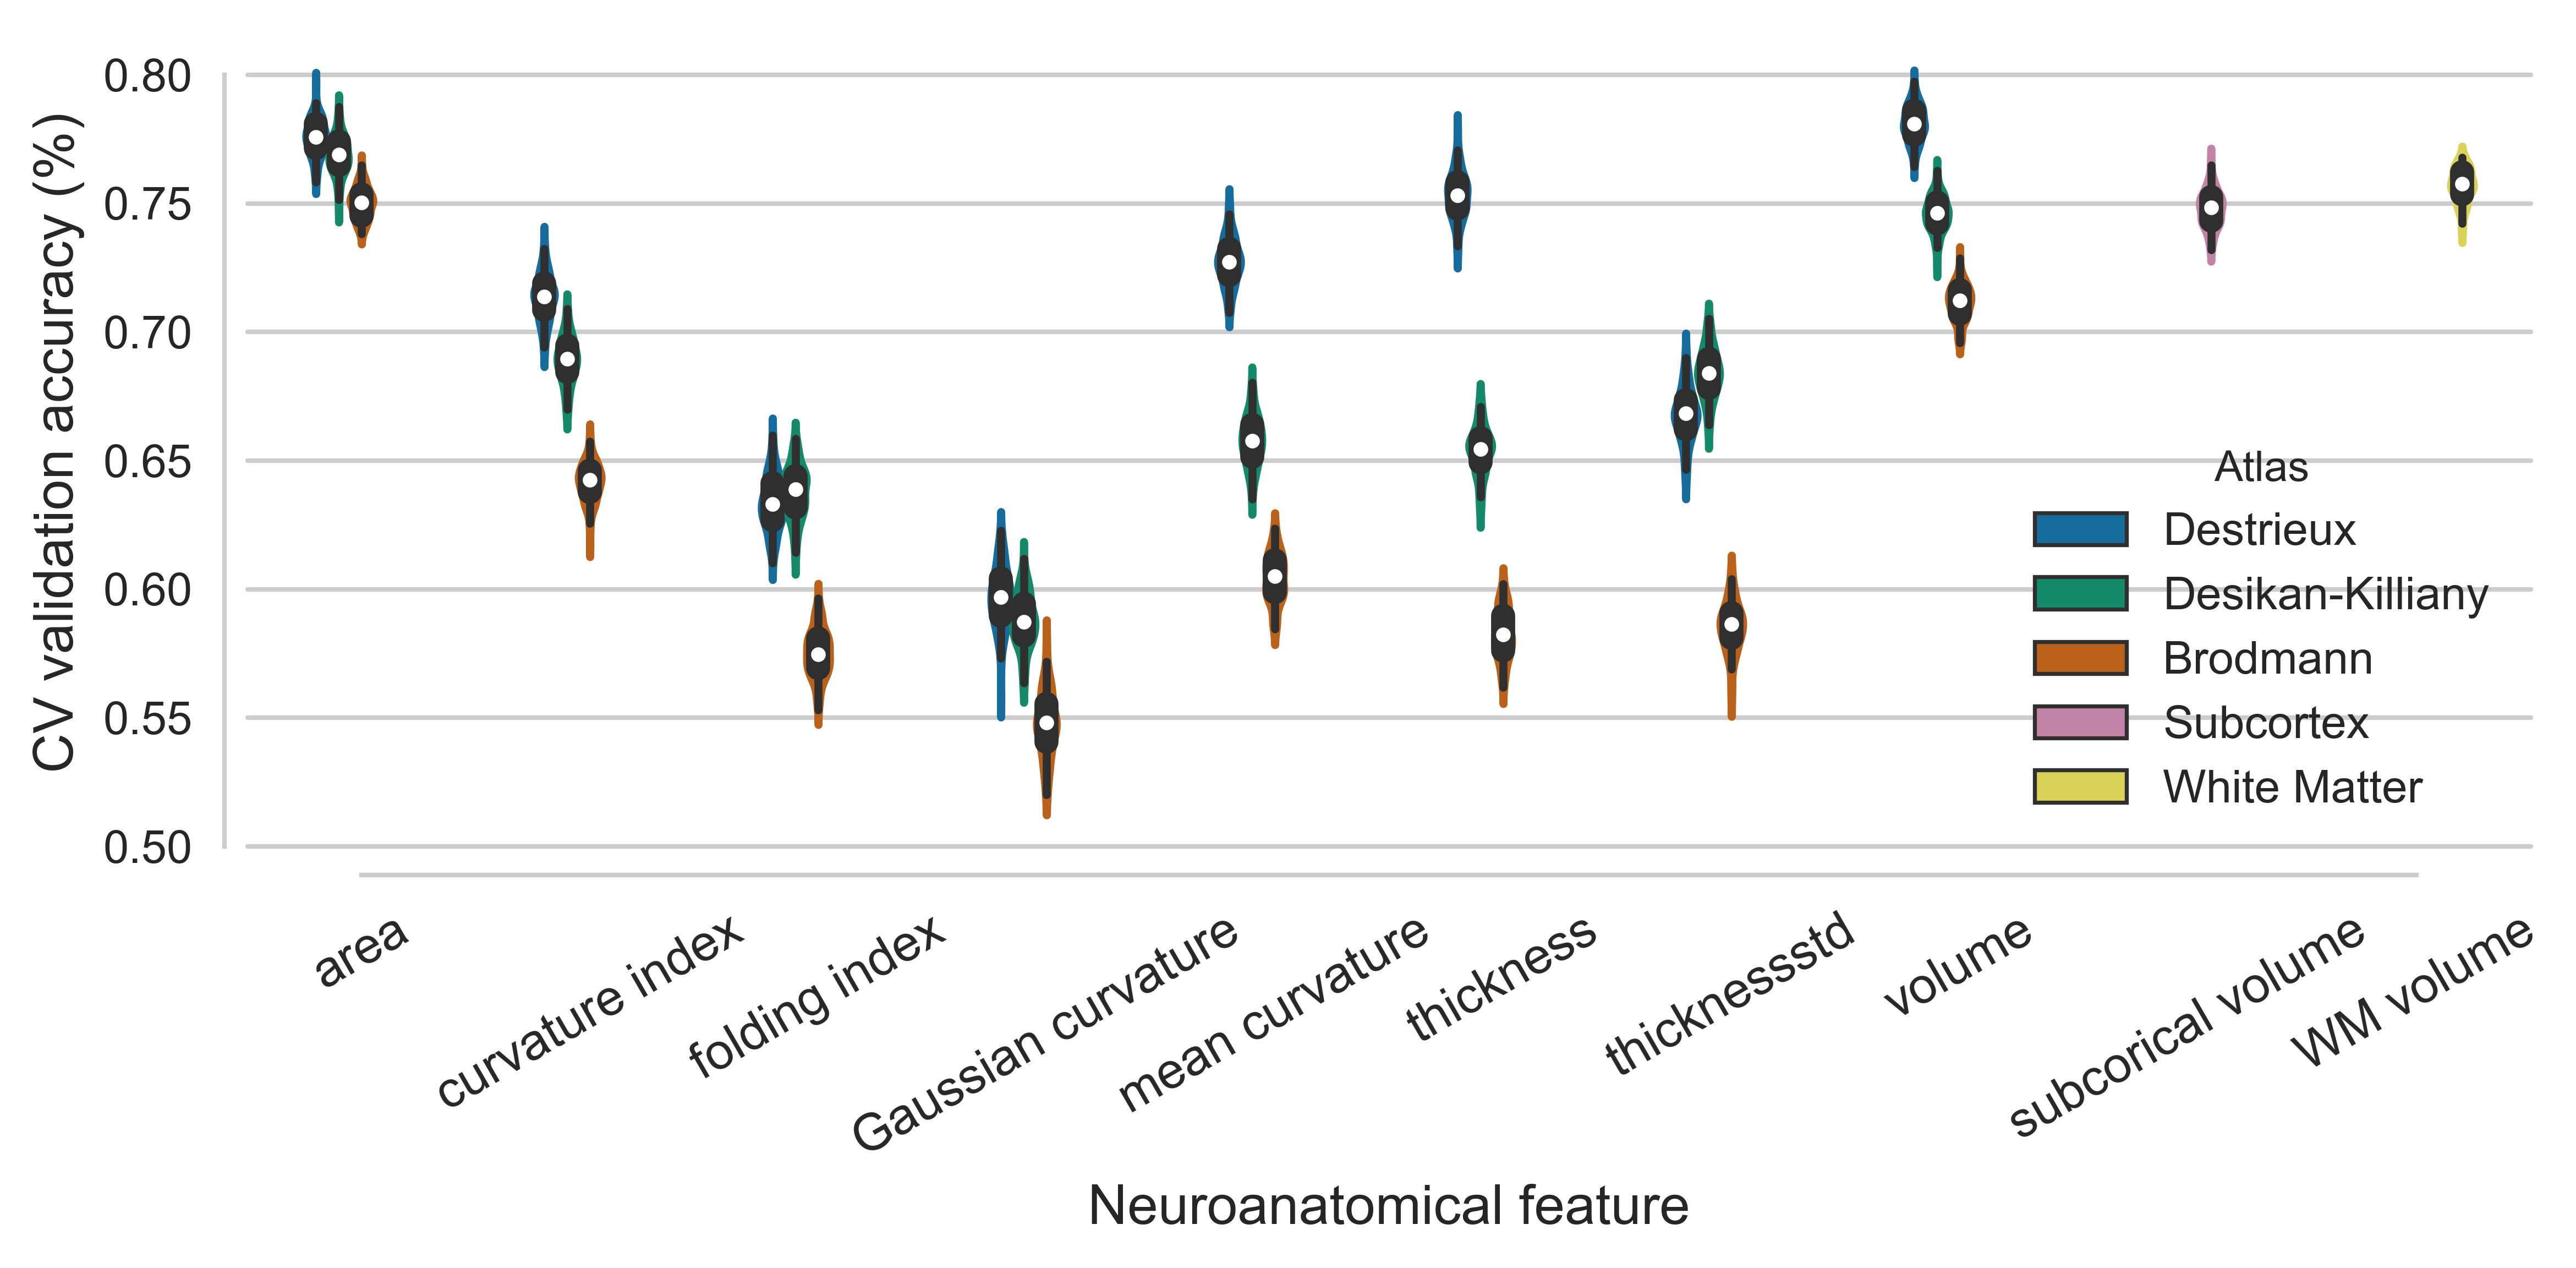

In [11]:
## Separate figure for each atlas
import datetime
estimate = "VA"
df.replace(to_replace='wmparc', value='White Matter', inplace=True)
df.replace(to_replace='aseg', value='Subcortex', inplace=True)
df.replace(to_replace='broadman', value='Brodmann', inplace=True)
df.replace(to_replace='aparc_2009', value='Destrieux', inplace=True)
df.replace(to_replace='aparc_aseg', value='Desikan-Killiany', inplace=True)

df.replace(to_replace='curvind', value='curvature index', inplace=True)
df.replace(to_replace='gauscurv', value='Gaussian curvature', inplace=True)
df.replace(to_replace='meancurv', value='mean curvature', inplace=True)
df.replace(to_replace='meancurv', value='mean curvature', inplace=True)
df.replace(to_replace='foldind', value='folding index', inplace=True)

fig = plt.figure(figsize=[8,4],dpi=600)
# plt.plot([-1,9],[.72,.72],color='grey')
sns.set_style("whitegrid")
sns.violinplot(x="Feature", y=estimate, data=df, hue="Atlas", palette="colorblind",width=0.5)
sns.despine(offset=5, trim=True)
plt.xlabel('Neuroanatomical feature',size=12)
if estimate=="AUC":
    plt.ylabel('Area under ROC curve',size=12)
else:  
    plt.ylabel('CV validation accuracy (%)',size=12)
plt.xticks(fontsize=11,rotation=30)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()